### **Day 21: *Grand Ol’ Smashin’ Finale***

Dot's outside tending to their garden, looking at the little shoots pushing out of the earth. The seeds they planted a little while ago are actually growing, which is incredible. Dot feels so proud and parental, whispering congrats to the sprouting seeds.

When they go back inside, it's dark for some reason. It takes a second for their eyes to adjust - who pulled back the curtains and shut off the lights? They throw open the curtain to let the last rays of sunlight in, and suddenly there's a yell.

Surprise! Dot looks around their cabin, taking in the faces of the shopkeeper, their neighbour, Bessie, the punk cows, and the cow farmer. Everyone's here for some reason.

Dot asks the uninvited guests what the reason for their visit is. It's the end of the challenge! You've made it so far! They applaud Dot, who has no clue what in the world is going on. Challenge? What are they talking about?

Dot shrugs off their confusion. Despite the weird circumstances, they do love a party. This is a great opportunity for everyone to play some retro games together! Help Dot figure out what games would be best to play together. 

### Tutorial

Welcome to the end of the 21-Day Data Challenge! Congratulations, you are on the final stretch!  

Through the past 20 days, we've gone over the fundamentals of Python, Pandas, and Matplotlib. With these three technologies combined, you're well on your way to doing great data analytics work.

In today's challenge, we'll be integrating aspects from all of the previous challenges, combining them in an exploratory data analysis of a video game dataset. 

When digging into today's dataset, don't forget to be curious about your data, use your intuition to drive your analysis and uncover interesting insights. To learn more on the exploratory data analysis process, read this [article](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15).

In case you get stuck, please refer to the respective user guides below or do a quick web search. 

1. [Pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
2. [Matplotlib](https://matplotlib.org/3.3.3/tutorials/index.html)

-------
**Why should I use the documentation?**

On the job as a data scientist or data analyst, more often than not, you may find yourself looking up the documentation of a particular function or plugin you use. Don't worry if there are a few functions you don't know by heart. However, there are just too many to know! An essential skill is to learn how to navigate documentation and understand how to apply the examples to your work. 

--------

### Challenge

Dot wants to play retro video games with all their new friends! Help them figure out which games would be best.

Questions: 

1. What is the correlation coefficient between Critic_Score and User_Score?

      - **Note**: You may have to clean some of the columns and fill it with the median value (if numerical). 
    
    
2. Plot the top 5 best selling games released before the year 2000.

     -  **Note**: Use Global_Sales
    
    
3. Create a new column called Aggregate_Score, which returns the proportional average between Critic Score and User_Score based on Critic_Count and User_Count. Plot a horizontal bar chart of the top 5 highest rated games by Aggregate_Score, not published by Nintendo before the year 2000. From this bar chart, what is the highest rated game by Aggregate_Score?

    -  **Note**: Critic_Count should be filled with the mean. User_Count should be filled with the median.
    
    
**Stretch:**

Don't stop at the above challenges, be inquisitive of your given dataset, dive deeper, and share your insights on the  [forum](https://21day-data-forum.lighthouselabs.ca/). For your reference, the dataset used in today's challenge can be downloaded for free from [Kaggle](https://www.kaggle.com/gregorut/videogamesales).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('video_games.csv')
df.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,7.5,NaN,NaN,NaN


In [4]:
from IPython.display import HTML
import base64  
import pandas as pd  

def create_download_link( df, title = "Download CSV file", filename = "video_games.csv"):  
    csv = df.to_csv(index =False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [8]:
critic_score_median = df['Critic_Score'].median()
critic_score_median

71.0

In [9]:
user_score_median = df['User_Score'].median()
user_score_median

7.5

In [10]:
df['Critic_Score'] =  df['Critic_Score'].fillna(value =critic_score_median)
df['User_Score'] =  df['User_Score'].fillna(value =user_score_median)
df[['Critic_Score','User_Score']]

,Critic_Score,User_Score
0,76.0,8.0
1,71.0,7.5
2,82.0,8.3
3,80.0,8.0
4,71.0,7.5
...,...,...
16714,71.0,7.5
16715,71.0,7.5
16716,71.0,7.5
16717,71.0,7.5


In [11]:
df[['Critic_Score','User_Score']].corr()

,Critic_Score,User_Score
Critic_Score,1.000000,0.478573
User_Score,0.478573,1.000000


In [12]:
global_sales_df = df[df['Year_of_Release']<2000]
global_sales_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71.0,NaN,7.5,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,71.0,NaN,7.5,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,71.0,NaN,7.5,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,71.0,NaN,7.5,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,71.0,NaN,7.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16543,Grand Prix Legends,PC,1997.0,Racing,Vivendi Games,0.00,0.01,0.00,0.00,0.01,71.0,NaN,7.5,6.0,Papyrus,E
16611,Samurai Shodown: Warrios Rage,PS,1999.0,Fighting,SNK,0.01,0.00,0.00,0.00,0.01,71.0,NaN,7.5,NaN,NaN,NaN
16670,Psychic Detective,PS,1995.0,Adventure,Electronic Arts,0.01,0.00,0.00,0.00,0.01,71.0,NaN,7.5,NaN,NaN,NaN
16685,Worms 2,PC,1997.0,Strategy,Microprose,0.00,0.01,0.00,0.00,0.01,71.0,NaN,8.1,12.0,Team 17,K-A


In [15]:
global_sales_df = global_sales_df.sort_values(by='Global_Sales',ascending= False).head()
global_sales_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71.0,NaN,7.5,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,71.0,NaN,7.5,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,71.0,NaN,7.5,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,71.0,NaN,7.5,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,71.0,NaN,7.5,NaN,NaN,NaN


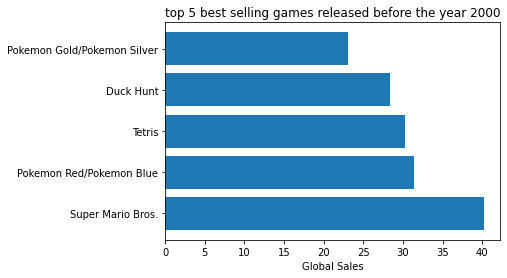

In [17]:
plt.figure()
plt.title('top 5 best selling games released before the year 2000')
plt.xlabel('Global Sales')
plt.barh(y = global_sales_df['Name'],width = global_sales_df['Global_Sales'])
plt.show()

In [22]:
critic_score_mean = df['Critic_Score'].mean()
user_score_mean = df['User_Score'].mean()
df['Critic_Score'] = critic_score_mean
df['User_Score'] = user_score_mean
df['Aggregate_Score'] = ((df['Critic_Count']* df['Critic_Score'])+ (df['User_Count']*(df['User_Score']*10)))/(df['User_Count'])

In [23]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Aggregate_Score
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,70.010886,51.0,7.32978,322.0,Nintendo,E,84.386486
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,70.010886,NaN,7.32978,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,70.010886,73.0,7.32978,709.0,Nintendo,E,80.506260
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,70.010886,73.0,7.32978,192.0,Nintendo,E,99.916527
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,70.010886,NaN,7.32978,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,70.010886,NaN,7.32978,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,70.010886,NaN,7.32978,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,70.010886,NaN,7.32978,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,70.010886,NaN,7.32978,NaN,NaN,NaN,NaN


In [24]:
new_df = df[(df['Publisher'] != 'Nintendo')&(df['Year_of_Release']<2000)]

In [25]:
new_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Aggregate_Score
52,Gran Turismo,PS,1997.0,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95,70.010886,16.0,7.32978,138.0,Polyphony Digital,E,81.415009
65,Final Fantasy VII,PS,1997.0,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72,70.010886,20.0,7.32978,1282.0,SquareSoft,T,74.390018
67,Gran Turismo 2,PS,1999.0,Racing,Sony Computer Entertainment,3.88,3.42,1.69,0.50,9.49,70.010886,23.0,7.32978,135.0,Polyphony Digital,T,85.225585
88,Final Fantasy VIII,PS,1999.0,Role-Playing,SquareSoft,2.28,1.72,3.63,0.23,7.86,70.010886,24.0,7.32978,644.0,SquareSoft,T,75.906906
89,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81,70.010886,NaN,7.32978,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16543,Grand Prix Legends,PC,1997.0,Racing,Vivendi Games,0.00,0.01,0.00,0.00,0.01,70.010886,NaN,7.32978,6.0,Papyrus,E,NaN
16611,Samurai Shodown: Warrios Rage,PS,1999.0,Fighting,SNK,0.01,0.00,0.00,0.00,0.01,70.010886,NaN,7.32978,NaN,NaN,NaN,NaN
16670,Psychic Detective,PS,1995.0,Adventure,Electronic Arts,0.01,0.00,0.00,0.00,0.01,70.010886,NaN,7.32978,NaN,NaN,NaN,NaN
16685,Worms 2,PC,1997.0,Strategy,Microprose,0.00,0.01,0.00,0.00,0.01,70.010886,NaN,7.32978,12.0,Team 17,K-A,NaN
